In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [17]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [18]:
fn_temp = 'med-cmcc-tem-an-fc-m_1628662441026.nc' # THETAO all 12 months and depths

nut_nc = [os.path.join(fn_temp) for f in fn_temp]
nut_ds = [ xr.open_dataset(nc) for nc in nut_nc]

j = 0
nut_ds[j]

<xarray.Dataset>
Dimensions:  (depth: 74, lat: 216, lon: 241, time: 8)
Coordinates:
  * depth    (depth) float32 1.018 3.166 5.465 7.92 ... 937.9 971.1 1.005e+03
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
  * time     (time) datetime64[ns] 2019-05-16T12:00:00 ... 2019-12-16T12:00:00
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
Data variables:
    thetao   (time, depth, lat, lon) float32 ...
Attributes:
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_type:                   analysis
    FROM_ORIGINAL_FILE__field_type:  monthly_mean_centered_at_time_field
    title:                           Potential Temperature (3D) - Monthly Mean 
    bulletin_date:                   20210713
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [19]:
tx = nut_ds[j].isel(time=5).sel(lat=slice(37, 46), lon=slice(12, 22))
tx

<xarray.Dataset>
Dimensions:  (depth: 74, lat: 216, lon: 241)
Coordinates:
  * depth    (depth) float32 1.018 3.166 5.465 7.92 ... 937.9 971.1 1.005e+03
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
    time     datetime64[ns] 2019-10-16T12:00:00
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
Data variables:
    thetao   (depth, lat, lon) float32 ...
Attributes:
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_type:                   analysis
    FROM_ORIGINAL_FILE__field_type:  monthly_mean_centered_at_time_field
    title:                           Potential Temperature (3D) - Monthly Mean 
    bulletin_date:                   20210713
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [20]:
lon_name   = 'lon'
lat_name   = 'lat'

time_name  = 'time'
depth_name = 'depth'

temp       = 'thetao'

time_sel = '2019-10-16T12:00:00'

##Define the location
## for 1 point Longitude and 1 point Latitude

point_X=17.4435
point_Y=41.951909

## fix the points

lat_sel, lon_sel = point_Y, point_X 

In [21]:
##Fix the size of the variable for the selected point

temp_mean_sel = tx.sel(lat=lat_sel, lon=lon_sel, method="nearest")

## x1111 defined for the x- axess to see how the Temperature changes with the depth in the ocean

x111=temp_mean_sel.thetao

## z111 defined in minus to see the changes the ocean profondity

z111=-temp_mean_sel.thetao.depth

In [22]:
print(len(z111),len(x111))

74 74


In [23]:
temp_mean_sel

<xarray.Dataset>
Dimensions:  (depth: 74)
Coordinates:
  * depth    (depth) float32 1.018 3.166 5.465 7.92 ... 937.9 971.1 1.005e+03
    lon      float32 17.46
    time     datetime64[ns] 2019-10-16T12:00:00
    lat      float32 41.94
Data variables:
    thetao   (depth) float32 ...
Attributes:
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_type:                   analysis
    FROM_ORIGINAL_FILE__field_type:  monthly_mean_centered_at_time_field
    title:                           Potential Temperature (3D) - Monthly Mean 
    bulletin_date:                   20210713
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [24]:
#selected profondity for the interpolation

z = np.array([5, 10, 20, 40,100,200,300,400,500,1000])
tx1 = tx.interp(depth=z, method="linear")

In [25]:
temp_mean_sel01 = tx1.sel(lat=lat_sel, lon=lon_sel, method="nearest")
temp_mean_sel01

<xarray.Dataset>
Dimensions:  (depth: 10)
Coordinates:
    lon      float32 17.46
    time     datetime64[ns] 2019-10-16T12:00:00
    lat      float32 41.94
  * depth    (depth) int32 5 10 20 40 100 200 300 400 500 1000
Data variables:
    thetao   (depth) float64 21.68 21.66 19.47 16.06 ... 14.27 14.17 14.05 13.52
Attributes:
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_type:                   analysis
    FROM_ORIGINAL_FILE__field_type:  monthly_mean_centered_at_time_field
    title:                           Potential Temperature (3D) - Monthly Mean 
    bulletin_date:                   20210713
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [26]:
#tempereture and depth for the interpolated depth  
x11=temp_mean_sel01.thetao
z11=-temp_mean_sel01.thetao.depth

In [27]:
print(len(z11),len(x11))

10 10


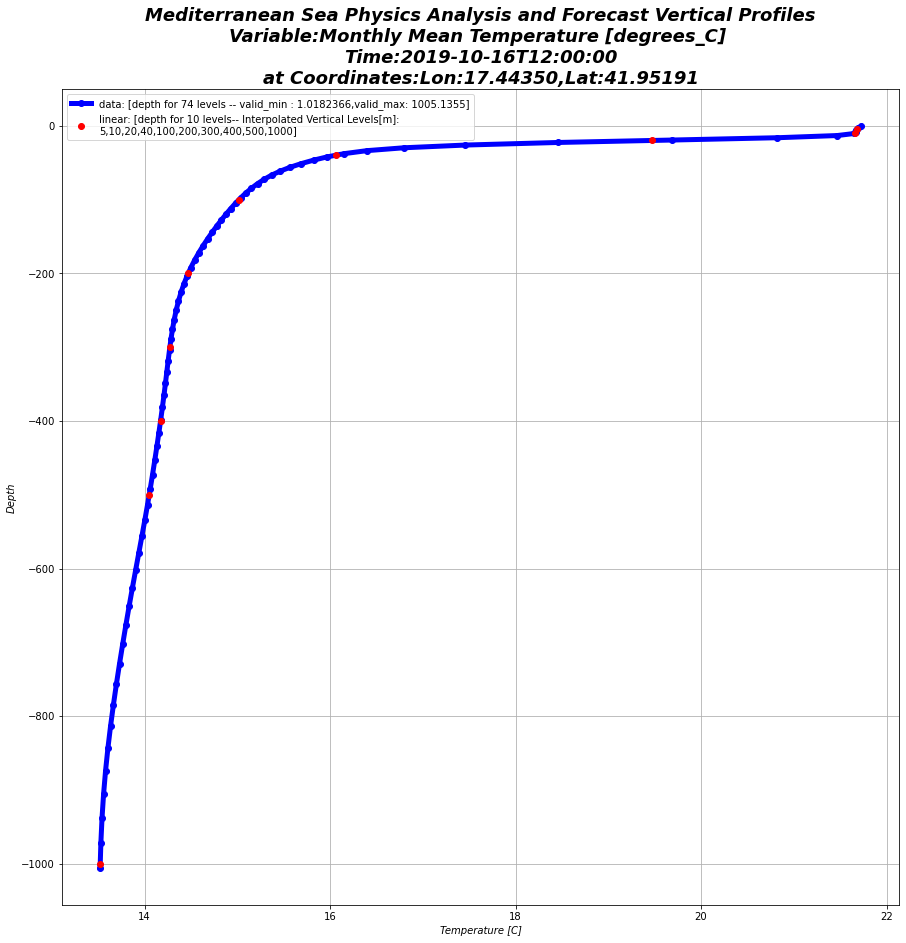

In [28]:
width_inch = 15
height_inch = 15
fig = plt.subplots(figsize=(width_inch, height_inch))

## font style--as you wish-- also can be default

title_fontstyle = {
    "fontsize": "18",
    "fontstyle": "italic",
    "fontweight": "bold",
}

title_fontstyle1 = {
    "fontsize": "10",
    "fontstyle": "italic",
}


title = "Mediterranean Sea Physics Analysis and Forecast Vertical Profiles\nVariable:Monthly Mean Temperature [{:s}] \nTime:{:}\nat Coordinates:Lon:{:.5f},Lat:{:.5f}".format(temp_mean_sel.thetao.units,time_sel,lon_sel,lat_sel)

plt.title(title, **title_fontstyle)

plt.grid()
plt.plot(x111, z111,'ob-',x11, z11,'or',linewidth=5)
plt.xlabel("Temperature [C]",**title_fontstyle1)
plt.ylabel("Depth",**title_fontstyle1)
plt.legend(['data: [depth for 74 levels -- valid_min : 1.0182366,valid_max: 1005.1355]', 'linear: [depth for 10 levels-- Interpolated Vertical Levels[m]:\n5,10,20,40,100,200,300,400,500,1000]'], loc='best')
#plt.savefig('temperature_by_depth.png')
plt.show()

plt.close()